In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout, Conv1D, MaxPooling1D, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
# Load the dataset to see its structure
df = pd.read_csv(r'C:\Users\bugat\Prosjekter\Tekstanalyse\git_NLP\Tekstanalyse\git_NLP_data\new_df.csv')

## Exploratary analysis

In [29]:
# from collections import Counter
# import ast  # For converting string representations of lists back into lists

# # Function to convert string representation of lists to actual lists
# def str_to_list(str_list):
#     return ast.literal_eval(str_list)

# # Convert the 'dependency_tags' and 'pos_tags' columns from string representations to lists
# dependency_tags = df['Dependency_Tags'].to_list()
# pos_tags = df['POS_Tags'].to_list()

# # Analyze the frequency of dependency tags and POS tags for each political leaning
# liberal_deps = df[df['Political_Lean'] == 'Liberal']['Dependency_Tags'].explode()
# conservative_deps = df[df['Political_Lean'] == 'Conservative']['Dependency_Tags'].explode()

# liberal_pos = df[df['Political_Lean'] == 'Liberal']['POS_Tags'].explode()
# conservative_pos = df[df['Political_Lean'] == 'Conservative']['POS_Tags'].explode()

# # Calculate the most common tags for each category
# most_common_liberal_deps = Counter(liberal_deps).most_common(10)
# most_common_conservative_deps = Counter(conservative_deps).most_common(10)

# most_common_liberal_pos = Counter(liberal_pos).most_common(10)
# most_common_conservative_pos = Counter(conservative_pos).most_common(10)

# (most_common_liberal_deps, most_common_conservative_deps, most_common_liberal_pos, most_common_conservative_pos)


In [30]:
df['All_text'] = df['All_text'].replace(['U.S.', 'U.S.A.'], ['US', 'USA'], regex=True)
df['Processed'] = df['Processed'].fillna(0)
df['Processed'] = df['Processed'].astype(str)
df['All_text'] = df['All_text'].fillna(0)
df['All_text'] = df['All_text'].astype(str)

# df.to_csv('new_df.csv', index=False)

# Making the relevant columns to lists
all_texts = (df['All_text'].to_list())
texts = df['Processed'].to_list()

# Setting the wanted text for further modelling
corpus = texts

In [31]:
# # Assuming you have three lists: texts, pos_tags, and dependency_tags
# # And your extract_features function is defined as provided

# # Process each item with extract_features and store the results
# extracted_features = [extract_features(text, pos, dep) for text, pos, dep in zip(texts, pos_tags, dependency_tags)]

# # Since you're interested in the features of the first item
# extracted_features

In [32]:
all_texts_length = df['All_text'].apply(lambda x: len(x.split()))
# Now, let's analyze the distribution of these sequence lengths
all_texts_length.describe()

count    12854.000000
mean        47.996032
std        183.825637
min          2.000000
25%         10.000000
50%         14.000000
75%         23.000000
max       5719.000000
Name: All_text, dtype: float64

## Processing

In [33]:
Y = pd.get_dummies(df['Political_Lean']).values
print('Shape of label tensor:', Y.shape)
num_classes = len(np.unique(Y))
Y_GBC = np.argmax(Y, axis=1)
print('Shape of label tensor:', Y_GBC.shape)

Shape of label tensor: (12854, 2)
Shape of label tensor: (12854,)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# def vectorize_or_return(input_data):
#     """
#     Vectorizes text input using TF-IDF if it's a list of strings, or returns the input as is if it's a list of integers.

#     Args:
#     - input_data: The input data, can be a list of strings (texts) or a list of integers.

#     Returns:
#     - Vectorized input as a sparse matrix if input is text, or the original input if it's numeric.
#     """

#     # Initialize the vectorizer
#     vectorizer = TfidfVectorizer()

#     # Check if the input is a list of strings (assuming each string is a document)
#     if isinstance(input_data, list) and all(isinstance(item, str) for item in input_data):
#         return vectorizer.fit_transform(input_data)
#     # Check if the input is a list of integers
#     elif isinstance(input_data, list) and all(isinstance(item, int) for item in input_data):
#         # Return the input as is, since it's already a sequence of integers
#         return np.array(input_data).reshape(-1, 1)
#     else:
#         # If the input does not match the expected format, raise an error
#         raise ValueError("Input must be a list of strings (texts) or a list of integers.")

In [36]:
# # Vectorize text
# X_GBC = vectorize_or_return(texts)
# Y_GBC = np.argmax(Y, axis=1)
# X_train_GBC, X_test_GBC, y_train_GBC, y_test_GBC = train_test_split(X_GBC,Y_GBC, test_size = 0.10, random_state = 42)

In [37]:
# from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
# from sklearn.feature_extraction.text import TfidfVectorizer
# from typing import Union, List
# import scipy
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import Binarizer
# from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, StratifiedKFold
# from sklearn.metrics import classification_report

## Naive Bayes

In [38]:
# clf = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2))),
#                     #options: ngram_range=(1, 2) or min_df=10, max_df=0.5
#                      ('binarizer', Binarizer()), # include this for detecting presence-absence of features
#                      ('clf', MultinomialNB())
#                     ])


# # StratifiedKFold provides train/test indices to split data in train/test sets.
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Cross-validation scores
# scores = cross_val_score(clf, texts, Y_GBC, cv=cv, scoring='accuracy')

# # Use cross_val_predict to make predictions
# predicted = cross_val_predict(clf, texts, Y_GBC, cv=cv)

# # Evaluation
# print("Cross-Validation Accuracy Scores:", scores)
# print("Mean CV Accuracy:", scores.mean())
# print("\nClassification Report:\n", classification_report(Y_GBC, predicted))

## Gradient booster

In [39]:
# # Train the model
# model = ensemble.GradientBoostingClassifier(learning_rate=0.1,
#                                             n_estimators=2000,
#                                             max_depth=9,
#                                             min_samples_split=6,
#                                             min_samples_leaf=2,
#                                             max_features=8,
#                                             subsample=0.9)
# model.fit(X_train_GBC, y_train_GBC)

In [40]:
# # Evaluate the model
# predicted_prob = model.predict_proba(X_test_GBC)[:,1]
# predicted = model.predict(X_test_GBC)

# accuracy = metrics.accuracy_score(predicted, y_test_GBC)
# print("Test accuracy: ", accuracy)
# print(metrics.classification_report(y_test_GBC, predicted, target_names=["0", "1"]))
# print("Test F-scoare: ", metrics.f1_score(y_test_GBC, predicted))

## LSTM

### Tokenizing


In [41]:
tokenizer = Tokenizer(oov_token='<OOV>') # Hyperparameters = num_words=vocab_size, oov_token=oov_tok
tokenizer.fit_on_texts(corpus)

sequences = tokenizer.texts_to_sequences(corpus)

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.\n\nFirst 10 is listen below:')
print(dict(list(word_index.items())[0:10]))

Found 22234 unique tokens.

First 10 is listen below:
{'<OOV>': 1, 'people': 2, 'like': 3, 'work': 4, 'right': 5, 'trump': 6, 'think': 7, 'state': 8, 'government': 9, 'party': 10}


In [42]:
word_dict = dict((num, val) for (val, num) in word_index.items())

In [43]:
word_dict

{1: '<OOV>',
 2: 'people',
 3: 'like',
 4: 'work',
 5: 'right',
 6: 'trump',
 7: 'think',
 8: 'state',
 9: 'government',
 10: 'party',
 11: 'social',
 12: 'want',
 13: 'worker',
 14: 'time',
 15: 'new',
 16: 'know',
 17: 'year',
 18: 'capitalism',
 19: 'country',
 20: 'biden',
 21: 'good',
 22: 'need',
 23: 'socialist',
 24: 'use',
 25: 'war',
 26: 'ukraine',
 27: 'world',
 28: 'woman',
 29: 'thing',
 30: 'way',
 31: 'support',
 32: 'system',
 33: 'russia',
 34: 'socialism',
 35: 'capitalist',
 36: 'democracy',
 37: 'class',
 38: 'free',
 39: 'democratic',
 40: 'pay',
 41: 'come',
 42: 'market',
 43: 'mean',
 44: 'man',
 45: 'help',
 46: 'find',
 47: 'vote',
 48: 'money',
 49: 'power',
 50: 'union',
 51: 'try',
 52: 'society',
 53: 'economic',
 54: 'life',
 55: 'day',
 56: 's',
 57: 'election',
 58: 'change',
 59: 'america',
 60: 'political',
 61: 'u',
 62: 'live',
 63: 'law',
 64: 'post',
 65: 'labor',
 66: 'communist',
 67: 'high',
 68: 'end',
 69: 'leave',
 70: 'policy',
 71: 'compa

In [44]:
reviews_encoded = []
for review in corpus:
    reviews_encoded.append([word_index.get(x) for x in review])

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

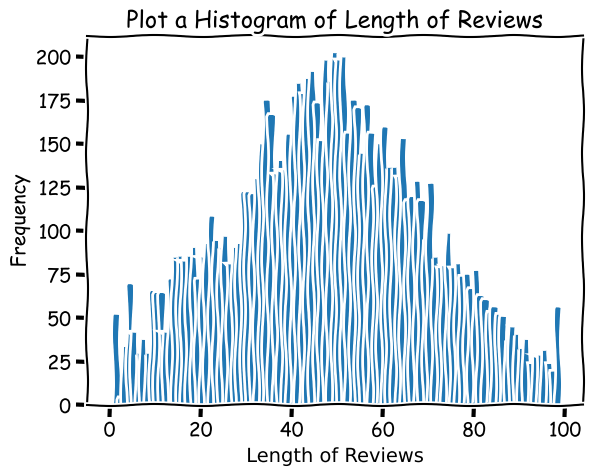

In [45]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

# Plot a Histogram of length of reviews
lengths = [len(x) for x in reviews_encoded]
with plt.xkcd():
    plt.hist(lengths, bins=range(100))
    plt.title('Plot a Histogram of Length of Reviews', **csfont)
    plt.xlabel('Length of Reviews', **hfont)
    plt.ylabel('Frequency')  # Add y-label if needed
    plt.show()

## Tokenizing the POS_tags

### Hyperparametere

In [46]:
# Defining pre-processing hyperparameters
max_len = 20
trunc_type = "post"
padding_type = "post"
vocab_size = len(word_index)
# This is fixed.
embedding_dim = 100

# Embedding

## Text embedding

### GloVe

In [47]:
file_path = r'C:\Users\bugat\OneDrive\Bilder\Dokumenter\Downloads\glove.6B.100d.txt'

In [48]:
embeddings_index = dict()
with open(file_path) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

vocab_size = len(word_index)
embeddings_GloVe = np.zeros((vocab_size+1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_GloVe[i] = embedding_vector

print(embeddings_GloVe.shape)

(22235, 100)


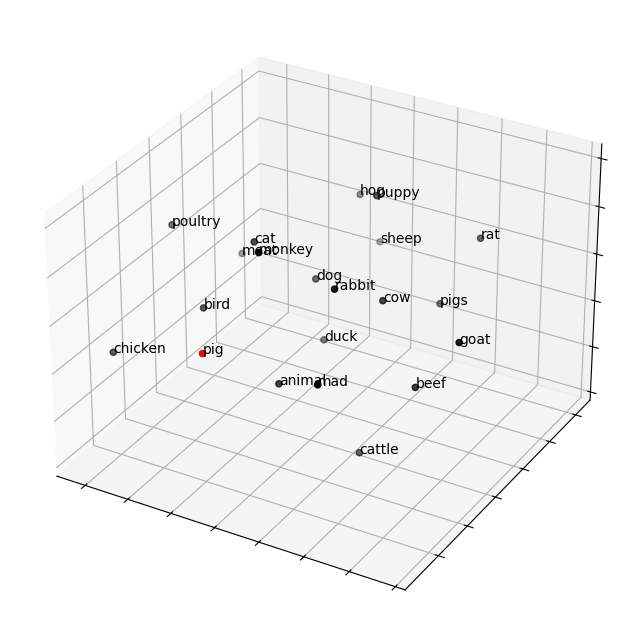

In [49]:
import numpy as np
import pandas as pd
from sklearn import manifold
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming embeddings_GloVe is your numpy array of GloVe embeddings
# Assuming word_to_index is your dictionary mapping words to their indices in embeddings_GloVe

word = "pig"
fig = plt.figure(figsize=(8,10))

# Function to find most similar words, adapted for numpy array embeddings
def find_most_similar(word, embeddings, word_to_index, topn=20):
    index = word_to_index[word]
    word_embedding = embeddings[index].reshape(1, -1)
    # Compute cosine similarity between this word and all others
    similarities = cosine_similarity(word_embedding, embeddings).flatten()
    # Get the indices of the topn most similar words
    most_similar_indices = similarities.argsort()[-topn-1:-1][::-1]
    # Map indices back to words
    index_to_word = {v: k for k, v in word_to_index.items()}
    most_similar_words = [index_to_word[i] for i in most_similar_indices]
    return most_similar_words

# Find most similar words to 'word' in GloVe
tot_words = [word] + find_most_similar(word, embeddings_GloVe, word_index, topn=20)

# Get the embeddings
X = np.array([embeddings_GloVe[word_index[w]] for w in tot_words])

# t-SNE for dimensionality reduction
n_samples = X.shape[0]
perplexity_value = min(40, n_samples - 1)
pca = manifold.TSNE(perplexity=perplexity_value, n_components=3, init='pca')
X = pca.fit_transform(X)

# Create DataFrame for plotting
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x", "y", "z"])
dtf_["input"] = 0
dtf_.loc[dtf_.index[0], "input"] = 1

# 3D Plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], dtf_[dtf_["input"]==0]['y'], dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], dtf_[dtf_["input"]==1]['y'], dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
for label, row in dtf_[["x", "y", "z"]].iterrows():
    ax.text(row['x'], row['y'], row['z'], s=label)

plt.show()

### Word2Vec

In [50]:
# for word embedding
import gensim
import gensim.downloader as gensim_api


w2v = gensim_api.load("word2vec-google-news-300")

[====================------------------------------] 40.2% 668.8/1662.8MB downloaded

KeyboardInterrupt: 

In [51]:
def print_vec(input_word: str):
    try:
        vec = w2v[input_word]
        print(vec)
    except KeyError:
        print(f"The word {input_word} does not appear in this model")

In [ ]:
print_vec('economy')

[ 0.18847656 -0.0703125  -0.16113281  0.03857422 -0.04956055 -0.23046875
 -0.15722656 -0.16992188  0.17089844 -0.01208496 -0.16015625 -0.02770996
  0.05932617  0.00491333 -0.13769531  0.39257812  0.06201172  0.30859375
  0.12890625 -0.07373047 -0.07128906  0.26953125  0.22167969  0.04150391
 -0.01361084 -0.1953125   0.06884766 -0.04541016  0.36328125 -0.05761719
 -0.16308594 -0.45507812 -0.16699219 -0.09179688  0.15234375 -0.08984375
  0.33789062  0.01574707 -0.08789062  0.3984375  -0.03112793 -0.15234375
  0.30859375  0.23242188  0.08984375  0.0050354   0.25585938  0.24316406
 -0.27734375  0.171875    0.23144531  0.23242188 -0.12597656  0.03613281
  0.2890625   0.00469971 -0.02441406  0.31835938  0.19726562 -0.14257812
 -0.01867676  0.01495361 -0.37695312 -0.06298828  0.09814453 -0.04736328
 -0.02087402  0.01757812  0.06982422  0.01092529 -0.20605469 -0.09521484
  0.15917969 -0.03588867  0.02539062 -0.16503906  0.01916504  0.24316406
  0.07128906 -0.20507812 -0.07958984 -0.02307129 -0

In [ ]:
## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1])
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
from gensim.models.word2vec import Word2Vec

## fit w2v
w2v = Word2Vec(lst_corpus,
               vector_size=embedding_dim,
               window=8,
               min_count=1,
               sg=1,
               #sample=1e-3,
               epochs=30)

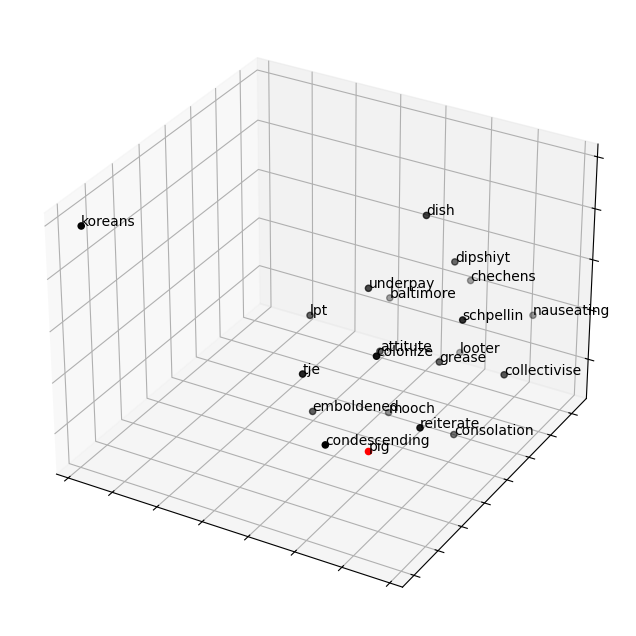

In [ ]:
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D

word = "pig"
fig = plt.figure(figsize=(10,8))
## word embedding
tot_words = [word] + [tupla[0] for tupla in w2v.wv.most_similar(word, topn=20)]

X = w2v.wv[tot_words]

# Assuming X is your dataset and it's already defined
n_samples = X.shape[0]

# Make sure perplexity is less than the number of samples
perplexity_value = min(40, n_samples - 1)  # Example adjustment

## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=perplexity_value, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_.loc[dtf_.index[0], "input"] = 1

## plot 3d
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'],
           dtf_[dtf_["input"]==0]['y'],
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'],
           dtf_[dtf_["input"]==1]['y'],
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[],
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

plt.show()

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings_w2v = np.zeros((len(word_index)+1, embedding_dim))
for word,idx in word_index.items():
    ## update the row with vector
    try:
        embeddings_w2v[idx] =  w2v.wv[idx]
    ## if word not in model then skip and the row stays all 0s
    except:
        embeddings_w2v[idx] = np.zeros(embedding_dim)

word = "london"
print("dic[word]:", word_index[word], "|idx")
print("embeddings[idx]:", embeddings_w2v[word_index[word]].shape,
      "|vector")

dic[word]: 2010 |idx
embeddings[idx]: (100,) |vector


In [ ]:
# # # We don't plan on training the model any further, so calling
# # # init_sims will make the model more memory efficient by normalizing the vectors in-place.
# # model.init_sims(replace=True)
# # # Save the model
# # model_name = "model_full_reddit"
# model.save(model_name)

In [52]:
import time

In [53]:
start = time.time()
X = tokenizer.texts_to_sequences(corpus)
X = pad_sequences(X, maxlen=max_len, padding="post", truncating='post')
print('Shape of data tensor:', X.shape)

# X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X,Y, test_size = 0.10, random_state = 42)
X_train_LSTM, y_train_LSTM = X, Y
print(X_train_LSTM.shape,y_train_LSTM.shape)
# print(X_test_LSTM.shape,y_test_LSTM.shape)
print('Total time: ' + str((time.time() - start)) + ' secs')

Shape of data tensor: (12854, 20)
(12854, 20) (12854, 2)
Total time: 0.16216206550598145 secs


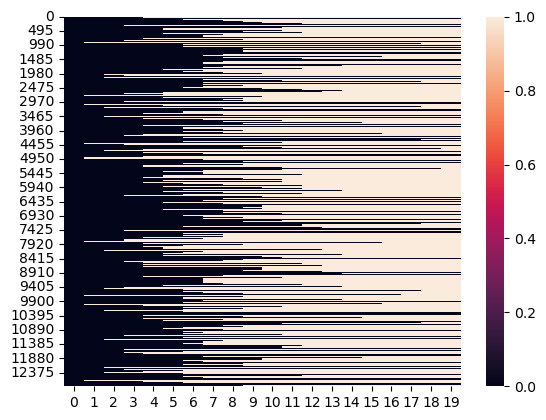

In [54]:
import seaborn as sns
sns.heatmap(X==0, vmin=0, vmax=1, cbar=True)
plt.show()

With the GloVe we add to parameters to the embedding layer, weights and trainable equal to False. We dont want the model to change the embedding weights during training.

In [ ]:
import os
from tensorflow.keras.callbacks import TensorBoard
import time

# # log_dir = r'C:\Users\bugat\OneDrive - NTNU\Vaer_2024\Tekstanalyse\Prosjektoppgave\Political_detection\TensorBoardLogs'

# NAME = 'project-{}'.format(int(time.time()))

# log_dir = 'logs/{}'.format(NAME)

# if not os.path.exists(log_dir):
#     os.makedirs(log_dir)

In [ ]:
import datetime
import tensorflow as tf

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:

tf.random.set_seed(42)

#batch_size = None
#batch_size=64

model = Sequential()
model.add(Input(shape=(20,)))
# Adding the Embedding layer with pre-trained weights and specifying input_length
model.add(Embedding(input_dim=embeddings_GloVe.shape[0],
                    output_dim=embeddings_GloVe.shape[1],
                    weights=[embeddings_GloVe],
                    trainable=False))

model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
# It's common to add a MaxPooling layer after a Conv layer to reduce dimensionality
model.add(MaxPooling1D())

model.add(Bidirectional(LSTM(64, # Number of hidden states, number of reccurent units for each vector
    activation='tanh',
    recurrent_activation='sigmoid',
    recurrent_dropout=0.2,
    return_sequences=False)))

model.add(Dense(77, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)


# history = model.fit(X_train_LSTM, y_train_LSTM,
#                     epochs=20, # Adjust based on your needs
#                     validation_split=0.2,
#                     batch_size=64,
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           2223500   
                                                                 
 spatial_dropout1d (Spatial  (None, 20, 100)           0         
 Dropout1D)                                                      
                                                                 
 conv1d (Conv1D)             (None, 20, 64)            6464      
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 64)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                     

(Batch size, length of sequence, dimensions)

In [ ]:
import tensorflow as tf
import numpy as np
import datetime
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import TensorBoard
import os

n_splits = 5
batch_size = 64
epochs = 5

# Setup KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Main log directory with the current datetime
current_time = datetime.datetime.now().strftime("%d.%m.%Y-%H.%M")
main_log_dir = os.path.join('logs', f'K_folds, K_fold_{current_time}')

loss_per_fold = []
acc_per_fold = []

fold_no = 1
for train, test in kf.split(X_train_LSTM):
    print(f'Training on fold {fold_no}...')

    # Subdirectory for the current fold
    fold_log_dir = os.path.join(main_log_dir, f'fold_{fold_no}')
    os.makedirs(fold_log_dir, exist_ok=True)

    # TensorBoard callback for the current fold
    tensorboard_callback = TensorBoard(log_dir=fold_log_dir, histogram_freq=1, update_freq='epoch')

    # Train the model on the current fold
    model_1 = model.fit(X_train_LSTM[train], y_train_LSTM[train],
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_train_LSTM[test], y_train_LSTM[test]),
                        callbacks=[tensorboard_callback],
                        verbose=1)

    # Evaluate the model
    scores = model.evaluate(X_train_LSTM[test], y_train_LSTM[test], verbose=0)
    print(f'Score for fold {fold_no}: Loss = {scores[0]}; Accuracy = {scores[1] * 100}%')
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1] * 100)

    fold_no += 1

# Print average scores
print(f'Average scores for all folds:\n> Loss: {np.mean(loss_per_fold)}; Accuracy: {np.mean(acc_per_fold)}%')

Training on fold 1...
Epoch 1/10
161/161 [==============================] - 3s 14ms/step - loss: 0.1567 - accuracy: 0.9352 - val_loss: 0.0540 - val_accuracy: 0.9864
Epoch 2/10
161/161 [==============================] - 2s 14ms/step - loss: 0.1568 - accuracy: 0.9343 - val_loss: 0.0572 - val_accuracy: 0.9841
Epoch 3/10
161/161 [==============================] - 2s 13ms/step - loss: 0.1487 - accuracy: 0.9393 - val_loss: 0.0592 - val_accuracy: 0.9825
Epoch 4/10
161/161 [==============================] - 2s 14ms/step - loss: 0.1453 - accuracy: 0.9394 - val_loss: 0.0619 - val_accuracy: 0.9821
Epoch 5/10
161/161 [==============================] - 2s 13ms/step - loss: 0.1342 - accuracy: 0.9467 - val_loss: 0.0714 - val_accuracy: 0.9728
Epoch 6/10
161/161 [==============================] - 2s 13ms/step - loss: 0.1355 - accuracy: 0.9428 - val_loss: 0.0753 - val_accuracy: 0.9751
Epoch 7/10
161/161 [==============================] - 2s 14ms/step - loss: 0.1344 - accuracy: 0.9450 - val_loss: 0.0842 

In [ ]:
# %tensorboard --logdir='c:/Users/bugat/OneDrive - NTNU/Vaer_2024/Tekstanalyse/Prosjektoppgave/Political_detection/logs' --port 6006
%tensorboard --logdir=logs/K_folds

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6015: logdir rC:\Users\bugat\OneDrive - NTNU\Vaer_2024\Tekstanalyse\Prosjektoppgave\Political_detection\logs\K_fold (started 1:39:35 ago; pid 10516)
  - port 6015: logdir logs/hparam_tuning (started 0:34:24 ago; pid 12164)
  - port 5000: logdir c:/Users/bugat/OneDrive - NTNU/Vaer_2024/Tekstanalyse/Prosjektoppgave/Political_detection (started 3:10:27 ago; pid 12920)
  - port 6006: logdir logs (started 16:48:57 ago; pid 15728)
  - port 6015: logdir logs/hparam_tuning (started 0:30:49 ago; pid 17048)
  - port 6008: logdir logs/K_folds (started 0:00:37 ago; pid 19564)
  - port 6013: logdir logs/K_fold (started 2:44:20 ago; pid 28492)
  - port 6007: logdir c:/Users/bugat/OneDrive - NTNU/Vaer_2024/Tekstanalyse/Prosjektoppgave/Political_detection (started 3:19:40 ago; pid 29824)
  - port 6006: logdir logs/ (started 19:27:20 ago; pid 3632)
  - port 6006: logdir logs/K_fold (started 0:15:40 ago; pid 4740)


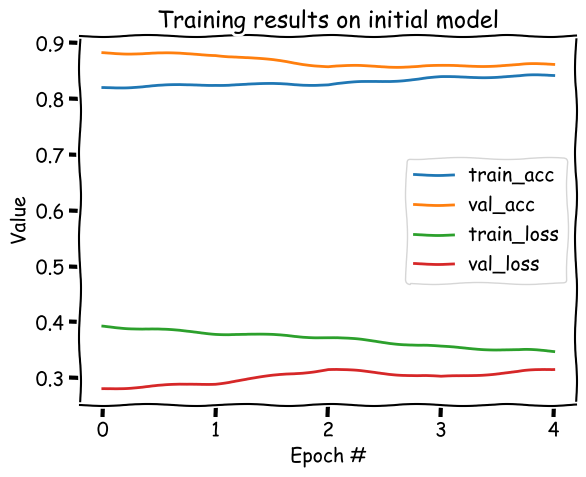

In [ ]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

with plt.xkcd():
    plt.plot(model_1.history['accuracy'], label='train_acc')
    plt.plot(model_1.history['val_accuracy'], label='val_acc')
    plt.plot(model_1.history['loss'], label='train_loss')
    plt.plot(model_1.history['val_loss'], label='val_loss')

    plt.xlabel('Epoch #')
    plt.ylabel('Value')
    plt.title('Training results on initial model')
    plt.legend()

    plt.show()

In [ ]:
# # Squeeze and convert to numpy
# squeezed_output = tf.squeeze(X_train_LSTM[train])  # This removes the batch dimension
# shap_input = squeezed_output.numpy()  # Convert to numpy array for SHAP

# import shap

# # we use the first 100 training examples as our background dataset to integrate over
# explainer = shap.DeepExplainer(model, X_train_LSTM[train][:100])

# # explain the first 10 predictions
# # explaining each prediction requires 2 * background dataset size runs
# shap_values = explainer(X_train_LSTM[test][:100])

## With POS features

In [ ]:
POS_tags = df['POS_Tags'].to_list()

In [ ]:
# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the POS tags
tokenizer.fit_on_texts(POS_tags)

# Convert POS tags to sequences
POS_sequences = tokenizer.texts_to_sequences(POS_tags)

# Pad the sequences
POS_padded= pad_sequences(POS_sequences, maxlen=max_len, padding='post')

# Assuming X is your preprocessed text data, POS_padded is your preprocessed POS tags, and Y is your labels
# Split the data into training and test sets for both inputs and the labels
# X_train_text, X_test_text, POS_train, POS_test, y_train, y_test = train_test_split(X, POS_padded, Y, test_size=0.2, random_state=42)
X_train_text, POS_train, y_train = X, POS_padded, Y

# Confirming the shapes of the splits
print("Shape of X_train_text:", X_train_text.shape)
# print("Shape of X_test_text:", X_test_text.shape)
print("Shape of POS_train:", POS_train.shape)
# print("Shape of POS_test:", POS_test.shape)
print("Shape of y_train:", y_train.shape)
# print("Shape of y_test:", y_test.shape)

Shape of X_train_text: (12854, 20)
Shape of POS_train: (12854, 20)
Shape of y_train: (12854, 2)


In [ ]:
POS_dict = tokenizer.word_index
POS_size = len(POS_dict)
POS_size

17

In [ ]:
POS_dict

NameError: name 'POS_dict' is not defined

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, concatenate

# Text input pathway
text_input = Input(shape=(max_len,), dtype='int32', name='text_input')  # Ensure the shape parameter matches your input length
text_embedded = Embedding(input_dim=vocab_size+1,
                          output_dim=embedding_dim,
                          input_length=max_len,
                          weights=[embeddings_GloVe],
                          trainable=False)(text_input)
text_dropout = SpatialDropout1D(0.2)(text_embedded)
text_conv = Conv1D(filters=32, kernel_size=5, activation='relu')(text_dropout)
text_pool = MaxPooling1D(pool_size=4)(text_conv)
text_lstm = Bidirectional(LSTM(64))(text_pool)

# POS tags input pathway
pos_input = Input(shape=(max_len,), dtype='int32', name='pos_input')
pos_embedded = Embedding(input_dim=POS_size+1, output_dim=100, input_length=max_len)(pos_input)
pos_dropout = SpatialDropout1D(0.2)(pos_embedded)
pos_conv = Conv1D(filters=32, kernel_size=5, activation='relu')(pos_dropout)
pos_pool = MaxPooling1D(pool_size=4)(pos_conv)
pos_lstm = Bidirectional(LSTM(32))(pos_pool)

# Combine the pathways
combined = concatenate([text_lstm, pos_lstm])

# Classification layers
layer = Dense(128, activation='relu')(combined)
layer = Dropout(0.5)(layer)
output = Dense(2, activation='softmax')(layer)

# Build and compile the model
POS_text_model = Model(inputs=[text_input, pos_input], outputs=output)
POS_text_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=False)

# Model summary
POS_text_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, 20)]                 0         []                            
                                                                                                  
 pos_input (InputLayer)      [(None, 20)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 20, 100)              2223500   ['text_input[0][0]']          
                                                                                                  
 embedding_2 (Embedding)     (None, 20, 100)              1800      ['pos_input[0][0]']           
                                                                                              

In [ ]:
n_splits=10

KF = KFold(n_splits=n_splits, shuffle=True, random_state=42) # Example: 5-fold cross-validation

# Prepare arrays to store results for each fold
fold_no = 1
loss_per_fold = []
acc_per_fold = []

for train, test in KF.split(X_train_text, y_train):
    # Create a fresh model for each fold

    # Fit the model
    POS_text_model.fit([X_train_text[train], POS_train[train]], y_train[train],
                        epochs=n_splits,  # Adjust based on your needs
                        batch_size=64,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)],
                        validation_data=([X_train_text[test], POS_train[test]], y_train[test]),
                        verbose=1)  # You can set verbose to 0 to reduce logs

    # Evaluate the model
    scores = POS_text_model.evaluate([X_train_text[test], POS_train[test]], y_train[test], verbose=0)
    print(f'Score for fold {fold_no}: {POS_text_model.metrics_names[0]} of {scores[0]}; {POS_text_model.metrics_names[1]} of {scores[1]*100}%')
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1] * 100)
    fold_no += 1

# Print average scores
print(f'Average scores for all folds:\n> Loss: {np.mean(loss_per_fold)}; Accuracy: {np.mean(acc_per_fold)}%')

Epoch 1/10
181/181 [==============================] - 15s 20ms/step - loss: 0.6269 - accuracy: 0.6585 - val_loss: 0.5717 - val_accuracy: 0.6983
Epoch 2/10
181/181 [==============================] - 1s 7ms/step - loss: 0.5865 - accuracy: 0.6897 - val_loss: 0.5576 - val_accuracy: 0.7162
Epoch 3/10
181/181 [==============================] - 1s 7ms/step - loss: 0.5599 - accuracy: 0.7062 - val_loss: 0.5559 - val_accuracy: 0.7278
Epoch 4/10
181/181 [==============================] - 1s 7ms/step - loss: 0.5228 - accuracy: 0.7359 - val_loss: 0.5523 - val_accuracy: 0.7333
Epoch 5/10
181/181 [==============================] - 1s 8ms/step - loss: 0.4959 - accuracy: 0.7562 - val_loss: 0.5694 - val_accuracy: 0.7387
Epoch 6/10
181/181 [==============================] - 1s 8ms/step - loss: 0.4643 - accuracy: 0.7776 - val_loss: 0.5749 - val_accuracy: 0.7123
Epoch 7/10
181/181 [==============================] - 1s 7ms/step - loss: 0.4339 - accuracy: 0.7916 - val_loss: 0.5837 - val_accuracy: 0.6928
Scor

In [ ]:
with plt.xkcd():
    plt.plot(POS_text_model.history['accuracy'], label='train_acc')
    plt.plot(POS_text_model.history['val_accuracy'], label='val_acc')
    plt.plot(POS_text_model.history['loss'], label='train_loss')
    plt.plot(POS_text_model.history['val_loss'], label='val_loss')

    plt.xlabel('Epoch #')
    plt.ylabel('Value')
    plt.title('Training results on initial model')
    plt.legend()

    plt.show()

TypeError: 'History' object is not subscriptable